TESTING CONVERT FUNCTIONS FOR PHOIBOS 150 DATA, COMPARISON WITH THE IGOR DATA


USES THE FOLDER dataEPFL/R1932

the folder contains all the igor output arrays for comparison



In [31]:
# This uses the autoreload function form ipynb, useful to reload modificaiton of the source code
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


[autoreload of specsanalyzer.core failed: Traceback (most recent call last):
  File "c:\Users\Michele\.conda\envs\specanalyserenv\lib\site-packages\IPython\extensions\autoreload.py", line 257, in check
    superreload(m, reload, self.old_objects)
  File "c:\Users\Michele\.conda\envs\specanalyserenv\lib\site-packages\IPython\extensions\autoreload.py", line 455, in superreload
    module = reload(module)
  File "c:\Users\Michele\.conda\envs\specanalyserenv\lib\importlib\__init__.py", line 169, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 619, in _exec
  File "<frozen importlib._bootstrap_external>", line 879, in exec_module
  File "<frozen importlib._bootstrap_external>", line 1017, in get_code
  File "<frozen importlib._bootstrap_external>", line 947, in source_to_code
  File "<frozen importlib._bootstrap>", line 241, in _call_with_frames_removed
  File "c:\users\michele\onedrive\documenti\github\specsanalyser\specsanalyzer\specsanalyzer\core

In [32]:
from specsanalyzer import SpecsAnalyzer
import matplotlib.pyplot as plt
import xarray as xr
import numpy as np

spa = SpecsAnalyzer()

import os

testdatapath = "../tests/data/dataEPFL/R9132/"
filelist = os.listdir(testdatapath)
print("Data path= ", testdatapath)
# this folders contains the AVG folder with the data, an info.txt vector and a scan vector

Data path=  ../tests/data/dataEPFL/R9132/


The shape of the raw data is:  (256, 344)


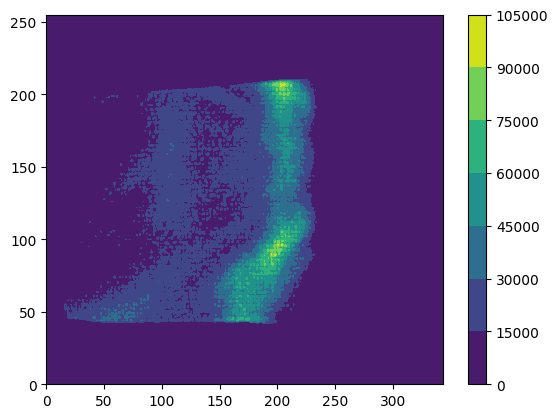

In [33]:
# get the raw image name from the list
rawimagelist = [i for i in filelist if "RAWDATA" in i]
raw_image_name = os.path.join(testdatapath, rawimagelist[0])


with open(raw_image_name) as file:
    tsv_data = np.loadtxt(file, delimiter="\t")
plt.figure()
h = plt.contourf(tsv_data)
plt.colorbar()
print("The shape of the raw data is: ", tsv_data.shape)
# plt.xlim(120,150)
# plt.ylim(150,200)

In [34]:
from specsanalyzer import SpecsAnalyzer
import matplotlib.pyplot as plt
import xarray as xr
import numpy as np

spa = SpecsAnalyzer()
scanparameters = spa.config

In [35]:
# load the module and import functions for reading the parameter table from the calib2d file
import specsanalyzer.convert

# let's get all the functions to be tested
from specsanalyzer.convert import get_damatrix_fromcalib2d
from specsanalyzer.convert import get_rr_da
from specsanalyzer.convert import calculate_polynomial_coef_da
from specsanalyzer.convert import mcp_position_mm

In [36]:
from specsanalyzer import SpecsAnalyzer
import matplotlib.pyplot as plt
import xarray as xr
import numpy as np

# call an instance of the class
spa = SpecsAnalyzer()
# io function used to get the calib 2d file in the class
calib2d_dictionary = specsanalyzer.io.parse_calib2d_to_dict(
    "../specsanalyzer/config/phoibos150.calib2d"
)
# calib2d_dictionary=specsanalyzer.io.parse_calib2d_to_dict('./config/phoibos150.calib2d')

# settings function used to get  configuration files
config_file = specsanalyzer.settings.parse_config(calib2d_dictionary)


# get the das  and the rr vector
# rr_array, da_matrix=  specsanalyzer.convert.get_rr_da("WideAngleMode", config_file)

AttributeError: module 'specsanalyzer' has no attribute 'io'

In [ ]:
# Load the IGOR txt Di_coeff values for comparison
igordatapath = "../tests/data/dataEPFL/R9132"
igordatapath_content = os.listdir(igordatapath)

# get the fitted coefficients
Di_coef_list = [i for i in igordatapath_content if "_coef" in i]

igor_D_coef_list = []
for i, name in enumerate(Di_coef_list):
    tmp_name = os.path.join(igordatapath, name)
    with open(tmp_name) as file:
        # check the name in row 1
        # first_line=file.readline()
        # print(first_line)

        # igor_D_coef_list.append(np.loadtxt(file, delimiter='\t', skiprows=1) )
        igor_D_coef_list.append(np.loadtxt(file, delimiter="\t"))
# igor_D_coef_matrix=np.vstack(igor_D_coef_list)
igor_D_coef_matrix = np.flip(np.vstack(igor_D_coef_list), axis=1)
print(igor_D_coef_matrix)  # row 0 D1 , row 1 D3, ...
print(np.vstack(igor_D_coef_list))

In [ ]:
# Load the IGOR txt Da_values for comparison
igordatapath = "../tests/data/dataEPFL/R9132"
igordatapath_content = os.listdir(igordatapath)

# get the fitted coefficients
Di_value_list = [i for i in igordatapath_content if "_value.tsv" in i]

igor_D_value_list = []
for i, name in enumerate(Di_value_list):
    tmp_name = os.path.join(igordatapath, name)
    with open(tmp_name) as file:
        # check the name in row 1
        # first_line=file.readline()
        # print(first_line)

        # igor_D_value_list.append(np.loadtxt(file, delimiter='\t', skiprows=1) )
        igor_D_value_list.append(np.loadtxt(file, delimiter="\t"))

igor_D_value_matrix = np.vstack(igor_D_value_list)

In [ ]:
# let's calculate the corresponding quantities in Pytohn

# load the module and import functions for reading the parameter table from the calib2d file
import specsanalyzer.convert

# let's get all the functions to be tested
from specsanalyzer.convert import get_damatrix_fromcalib2d
from specsanalyzer.convert import get_rr_da
from specsanalyzer.convert import calculate_polynomial_coef_da
from specsanalyzer.convert import mcp_position_mm
from specsanalyzer.convert import calculate_matrix_correction


spa = SpecsAnalyzer(config="../tests/data/dataEPFL/config/config.yaml")
config_dict = spa.config
lens_mode = "WideAngleMode"
kinetic_energy = 35.000000
pass_energy = 35.000000
work_function = 4.3
binning = 4

eshift = np.array(config_dict["calib2d_dict"]["eShift"])

aInner, damatrix = get_damatrix_fromcalib2d(
    lens_mode,
    kinetic_energy,
    pass_energy,
    work_function,
    config_dict,
)

dapolymatrix = calculate_polynomial_coef_da(
    damatrix, kinetic_energy, pass_energy, eshift
)


# note that for scan 9132 (and 9131) we have   retardatio ratio=   0.88 -> this is wrong imo, checke the effect of the work function
#  rr_inf =   10  rr_factor =   0.75 in igor

In [ ]:
print("das")
print(damatrix)
print(igor_D_value_matrix)
print("Difference in the interpolated D coeffiecients")
print(damatrix - igor_D_value_matrix)
# at the moment they differ by some %..

print("coefs")
print(dapolymatrix)
print(igor_D_coef_matrix)
print("Difference in the fitted polynomial coeffiecients")
print(dapolymatrix - igor_D_coef_matrix)
# at the moment they differ by some %..

In [ ]:
# get the rr and the damatrix
rr, damatrix = get_rr_da("WideAngleMode", config_dict)

In [ ]:
# let's get the jacobian matrices generate by the igor code
# and compare it to the one obtained by calculate_matrix_correction

# Jacobian
jname = [i for i in igordatapath_content if "Jacobian" in i][0]
with open(os.path.join(igordatapath, jname)) as file:
    jacobian_reference = np.loadtxt(file, delimiter="\t").T

print("The shape of the jacobian_reference is: ", jacobian_reference.shape)
# plt.xlim(120,150)
# plt.ylim(150,200)


(
    ek_axis,
    angle_axis,
    angular_correction_matrix,
    e_correction,
    jacobian_determinant,
) = calculate_matrix_correction(
    lens_mode,
    kinetic_energy,
    pass_energy,
    work_function,
    binning,
    config_dict,
)


print("The shape of the jacobian_determinant is: ", jacobian_determinant.shape)

delta_jacobian = jacobian_determinant - jacobian_reference

fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(10, 4))
subplot1 = ax1.contourf(jacobian_determinant)
subplot2 = ax2.contourf(jacobian_reference)
subplot3 = ax3.contourf(delta_jacobian)
fig.colorbar(subplot1, ax=ax1)
fig.colorbar(subplot2, ax=ax2)
fig.colorbar(subplot3, ax=ax3)

plt.tight_layout()

In [ ]:
# plt.plot(ek_axis,e_correction)
d_ecorrection = np.gradient(e_correction, ek_axis)
plt.plot(ek_axis, d_ecorrection)

In [ ]:
# e_correction
jname = [i for i in igordatapath_content if "E_Correction" in i][0]
jname
with open(os.path.join(igordatapath, jname)) as file:
    e_correction_reference = np.loadtxt(file, delimiter="\t")

plt.plot(e_correction)
plt.plot(e_correction_reference)

# ecorrection is different!!

In [ ]:
# e_correction
jname = [i for i in igordatapath_content if "Angular_Correction" in i][0]
jname
with open(os.path.join(igordatapath, jname)) as file:
    angle_correction_reference = np.loadtxt(file, delimiter="\t").T

delta_angle = angle_correction_reference - angular_correction_matrix

fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
subplot1 = ax1.contourf(angular_correction_matrix)
subplot2 = ax2.contourf(angle_correction_reference)
subplot3 = ax3.contourf(delta_angle)
fig.colorbar(subplot1, ax=ax1)
fig.colorbar(subplot2, ax=ax2)
fig.colorbar(subplot3, ax=ax3)
plt.tight_layout()